In [1]:
# Standard Error of Mean
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import scikit_posthocs as sp
import seaborn as sns
from scipy import stats

C:\Users\sulei\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\sulei\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
df = pd.read_csv(r"C:\Users\sulei\Documents\YL1.5_intensity_data.csv")

df_mean = (df.groupby('label', as_index=False).mean()).T
df_sem = (df.groupby('label', as_index=False).sem()).T
# groups = df.groupby("label").groups

# Set First Row as Header
df_mean.columns = df_mean.iloc[0]
df_mean = df_mean[1:]
df_sem.columns = df_sem.iloc[0]
df_sem = df_sem[1:]
df_sem.to_csv("YL1.5_sem_data.csv", encoding='utf-8', index=False)
print(df_mean.head())
print(df_sem.head())

label   vehicle    12h PT       24h       48h
0.02   0.004999  0.003024  0.003938   0.00335
0.04   0.005205  0.003192  0.004238  0.003552
0.06   0.005636  0.003424  0.004617  0.003879
0.08   0.006105  0.003688  0.005248  0.004287
0.1    0.006745  0.003974  0.005833  0.004871
label   vehicle    12h PT       24h       48h
0.02   0.000251  0.000279  0.000165   0.00017
0.04   0.000198  0.000264  0.000177  0.000198
0.06   0.000161  0.000249  0.000229  0.000236
0.08   0.000175  0.000253  0.000372  0.000279
0.1    0.000296  0.000279  0.000455  0.000265


In [19]:
my_columns = [" vehicle sem", "12h PT sem", "24h sem", "48h sem"]
df_sem.columns = my_columns
print(df_sem.head())

      vehicle sem 12h PT sem   24h sem   48h sem
0.02     0.000251   0.000279  0.000165   0.00017
0.04     0.000198   0.000264  0.000177  0.000198
0.06     0.000161   0.000249  0.000229  0.000236
0.08     0.000175   0.000253  0.000372  0.000279
0.1      0.000296   0.000279  0.000455  0.000265


In [20]:
df_merged = pd.concat([df_mean, df_sem], axis=1)
print(df_merged.head())

       vehicle    12h PT       24h       48h  vehicle sem 12h PT sem  \
0.02  0.004999  0.003024  0.003938   0.00335     0.000251   0.000279   
0.04  0.005205  0.003192  0.004238  0.003552     0.000198   0.000264   
0.06  0.005636  0.003424  0.004617  0.003879     0.000161   0.000249   
0.08  0.006105  0.003688  0.005248  0.004287     0.000175   0.000253   
0.1   0.006745  0.003974  0.005833  0.004871     0.000296   0.000279   

       24h sem   48h sem  
0.02  0.000165   0.00017  
0.04  0.000177  0.000198  
0.06  0.000229  0.000236  
0.08  0.000372  0.000279  
0.1   0.000455  0.000265  


In [21]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams.update({'font.size': 16})

Text(0.5, 1.0, 'Histogram of YL1.5')

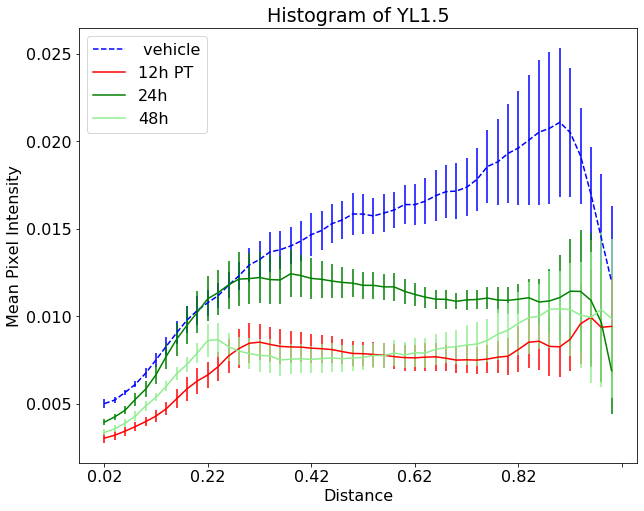

In [22]:
ax0 =  df_merged.plot(kind = "line", y = " vehicle", yerr = " vehicle sem", linestyle='--', c='blue')
ax1 = df_merged.plot(ax=ax0, kind = "line", y = "12h PT", yerr = "12h PT sem", c='red')
ax2 = df_merged.plot(ax=ax1, kind = "line", y = "24h", yerr = "24h sem", c='green')
df_merged.plot(ax=ax2, kind = "line", y = "48h", yerr = "48h sem", c='lightgreen')
#plt.gca().axes.get_xaxis().set_visible(False)
plt.xlabel('Distance')
plt.ylabel('Mean Pixel Intensity')
plt.title("Histogram of YL1.5")